

The Gaussian Orthogonal Ensemble:

(GOE): Matrices of this kind are of the form $\mathbf{H}_{N} = (h_{ij})_{i,j}^{N}$ where $h_{ij} = h_{ji}$ $\forall i,j$ and $\left\{x_{ij}| i\leq j\right\}$ are i.i.d gaussian random variables with $h_{ii}\sim \mathcal{N}(0,1/N)$ and $h_{ij}\sim \mathcal{N}(0,2/N)$ for $i<j$. More formally, on the space of symmetric $N\times N$ matrices
 

\begin{align*}
    \Omega_{N} = \left\{\mathbf{H}_{N} = (h_{ij})_{i,j}^{N}|h_{ij}\in R, h_{ij} = h_{ji}\forall i,j \right\}
\end{align*}

These matrices are invariant under orthogonal transformations $\mathbf{O}$, where $\mathbf{OO}^{\intercal} = \mathbf{1}$, this means an orthogonal  invariant random matrix ensemble is such that the matrix $\mathbf{OHO}^{\intercal}$ is as probable as the matrix $\mathbf{H}$.

An easy way to construct a GOE matrix is first to take a random matrix $\mathbf{A}$ of size $N\times N$ (it could be $N\times M $ as well) whose entries are iid gaussian random variables $a_{ij} \sim \mathcal{N}(0, \sigma^{2})$ and compute the following

\begin{align*}
    \mathbf{H} = \frac{\sigma(\mathbf{A} + \mathbf{A}^{\intercal})}{\sqrt{2N}} 
\end{align*}

Recall: The eigenvalue distribution for this ensemble is given by the Wigner semi-circle (or circular law)

\begin{align*}
    \rho_{sc}(\lambda) = \frac{1}{2\pi\sigma^{2}}\sqrt{4\sigma^{2}- \lambda^{2}}
\end{align*}

for $-2\sigma < \lambda <2\sigma$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def semicircle(x,s = 1):
    return (1/(2*np.pi*s*s))*np.sqrt((4*s*s)-x*x)#*(1 if np.abs(x)<=2*sigma else 0)


In [ ]:
x = np.linspace(-3,3,100)
sm = semicircle(x)

<ipython-input-3-7aff58ced33e>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/(2*np.pi*s*s))*np.sqrt((4*s*s)-x*x)#*(1 if np.abs(x)<=2*sigma else 0)


In [ ]:
N = 100
A = np.random.normal(0,1, size =(N,N))
H = (1/np.sqrt(2*N))*(A + A.T)

In [ ]:
u, _ = np.linalg.eig(H)

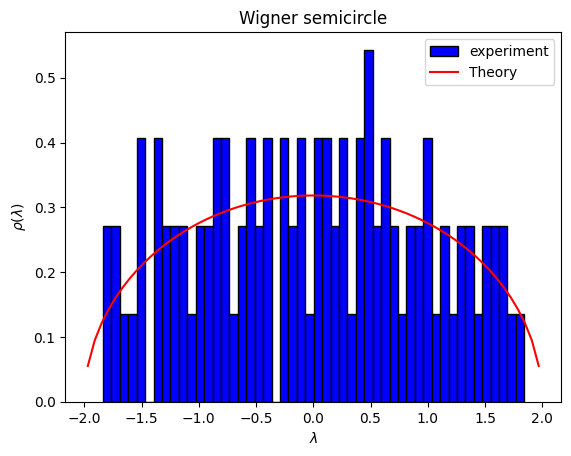

In [ ]:
plt.hist( u, bins = 50, color = 'blue', ec = 'black', density = True, label = 'experiment')
plt.plot(x, sm, color = 'red', label = 'Theory')
plt.title('Wigner semicircle')
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.legend(loc = 'best')
plt.show()

Hold your horses! Everything seems to eaay right? But how do we get this result?

Well it's complicated, the 'recipe' is defined nonetheless it can be troublesome. The Green's function for a random matrix $\mathbf{A}$ is defined as:

\begin{align*}
    \mathbf{G_{A}}(z) = (z\mathbf{1}_{N} - \mathbf{A})^{-1}
\end{align*}

Where $\mathbf{1}_{N}$ is the identity matrix of size $N\times N$.

The compute the Stieltjes transform as:

\begin{align*}
    g_{N}^{\mathbf{A}} = \frac{1}{N}\text{Tr}(\mathbf{G_{A}}(z)) = \frac{1}{N}\sum_{k=1}^{N}(z - \lambda_{k})^{-1}
\end{align*}

It is equivalent to

\begin{align*}
    g_{N}^{\mathbf{A}}(x) = \int_{I} \frac{\rho(\lambda)}{z-\lambda}, z \in \mathcal{C}\diagdown I
\end{align*}

At the large limit $N \rightarrow \infty $ 
\begin{align*}
    g(z) = \lim_{N \rightarrow \infty} g_{N}^{\mathbf{A}}(z)
\end{align*}

And the eigenvalues distribution can be obtained using the Sokhotski - Plemelj formula given by:

\begin{align*}
    \rho(x) = \frac{1}{\pi}\lim_{\eta \rightarrow 0^{+}}\text{Im}g(x - i\eta)
\end{align*}

In practice one to obtain $g(x)$ can be quite unclear and often requieres many tricks, it can feel like a catch-22.

Let's see how the stieltjes transform behaves for different values of $\eta$.



In [ ]:
def stieljes(x, e, eval):
  N = len(eval)
  g = 0 + 0*1j
  for ev in eval:
    g += 1/(x - e*1j + ev)
  return g/N  

<ipython-input-91-f63f90a8566f>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/(2*np.pi*sigma*sigma))*np.sqrt((4*sigma*sigma)-x*x)#*(1 if np.abs(x)<=2*sigma else 0)


In [ ]:
gs = []
eta = [ 1/N, 1/np.sqrt(N),1]
#eta1 = ['$1/N$','$1/\sqrt(N)$','$1$']

In [ ]:
for et in eta:
  g1 = stieljes(x, e = et, eval = u)
  gs.append( (1/np.pi)*np.imag(g1) )

gs = np.array(gs)  

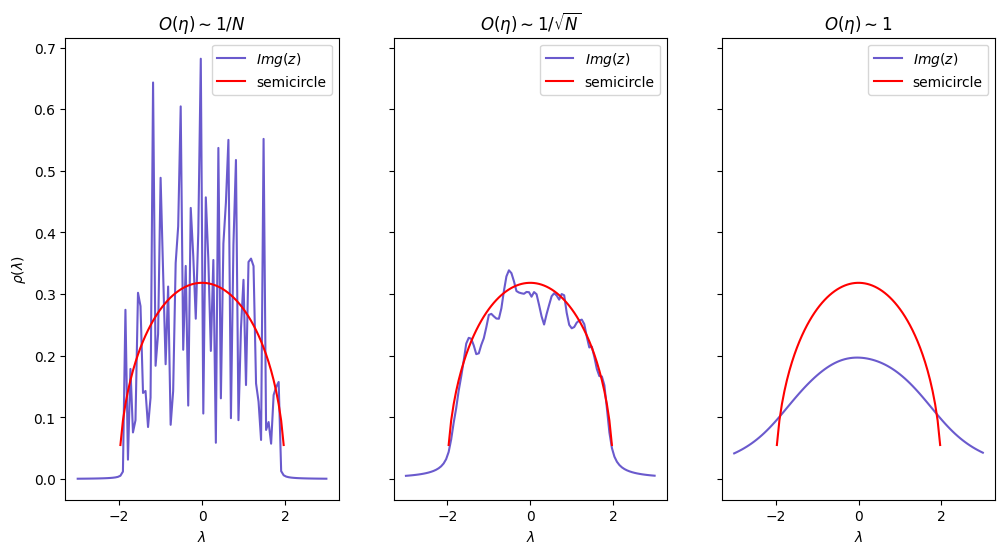

In [ ]:
fig, axs = plt.subplots(1,3, sharey=True, figsize = (12,6))

for i in range(3):
  axs[i].plot(x, gs[i], color = 'slateblue', label = '$Img(z)$' )
  axs[i].plot(x, sm, color = 'red', label = 'semicircle')
  axs[i].set_xlabel('$\lambda$')
  axs[i].legend(loc = 'best')
  

axs[0].set_ylabel('$\\rho(\lambda)$')
axs[0].set_title('$O(\eta)\sim 1/N$')
axs[1].set_title('$O(\eta)\sim 1/\sqrt{N}$')
axs[2].set_title('$O(\eta)\sim 1$')


plt.show()

In [ ]:
#for g in gs:
#  plt.plot(x, g, color = 'slateblue', label = '$Img(z)$' )
#  plt.plot(x, sm, color = 'red', label = 'semicircle')
#  #plt.title('$O(\eta)$ = '+st)
#  plt.xlabel('$\lambda$')
#  plt.ylabel('$\\rho(\lambda) - Img(z)$')
#  plt.legend(loc = 'best')
#  plt.show()

What is a 'good' value for $\eta$ then? We can compute an error function as:

$E_{\eta} =\left( \rho_{sm}(\lambda) - \frac{1}{\pi}\text{Im}g(\lambda - i\eta)\right)^{2}$

In [ ]:
def error( f, g):
  return (f-g)*(f-g)

In [ ]:
sm[np.isnan(sm)] = 0

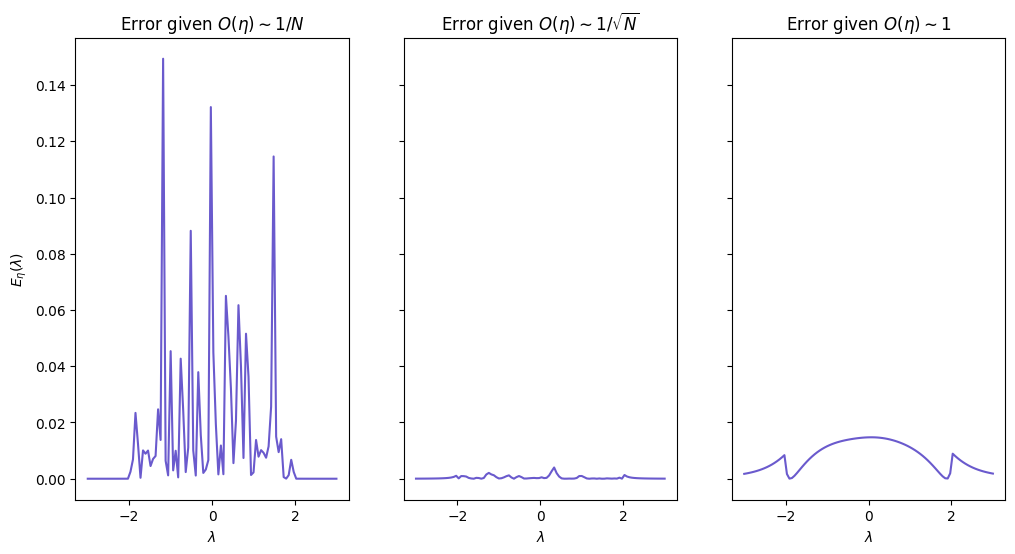

In [ ]:
fig, axs = plt.subplots(1,3, sharey=True, figsize = (12,6))


for i in range(3):
  E = error(sm, gs[i])
  axs[i].plot(x, E, color = 'slateblue' )
  #axs[i].plot(x, sm, color = 'red', label = 'semicircle')
  axs[i].set_xlabel('$\lambda$')
  #axs[i].legend(loc = 'best')
  

axs[0].set_ylabel('$E_{\eta}(\lambda)$')
axs[0].set_title('Error given $O(\eta)\sim 1/N$')
axs[1].set_title('Error given $O(\eta)\sim 1/\sqrt{N}$')
axs[2].set_title('Error given $O(\eta)\sim 1$')


plt.show()

In practice $\eta \rightarrow 0^{+}$ isn't as efficient as one thought.

Wishart Orthogonal Ensemble.

Let's talk about another kind of random matrices. Consider a random matrix $\mathbf{H}$ of size $N\times T$ and whose $h_{ij}$ entries are iid gaussian random variables $\mathcal{N}(0,\sigma^{2})$. 
We define compute a matrix $E$ as:
\begin{align*}
    \mathbf{E} = \frac{1}{T}\mathbf{H}\mathbf{H}^{\intercal}
\end{align*} 

$E$ is an $N\times N$ matrix also refered as the 'sample covariance matrix' (scm) or Wishart matrices, and $H$ as the 'data matrix'. 
$\mathbf{E}$ symmetric ($ \mathbf{E}= \mathbf{E}^{\intercal}$), positive semi-defined ($\lambda\ge 0$) and $\sum_{N}\lambda_{k} = 1$.
Define $q = N/T$, if $q>1$ then $\mathbf{E}$ has at least $N − T$ zero eigenvalues.

Notice that the expectation of $\mathbf{E}$ is:
\begin{align*}
    \mathbb{E}[E_{ij}] = \frac{1}{T}\mathbb{E}\left[\sum_{t=1}^{T}H_{it}H_{tj}\right] = \frac{1}{T}\sum_{t=1}^{T}C_{ij} = C_{ij}
\end{align*}

Thus we have $\mathbb{E}[\mathbf{E}] = \mathbf{C} $, where $\mathbf{C}$ is the true correlation matrix, as it is well known, the scm is an unbiased estimator of the true covariance matrix.

Similiar to the semi-circular law, the Wishart matrices converges to the following distribution:

\begin{align*}
    \rho_{mp}(\lambda) = \frac{1}{2\pi q \lambda} \sqrt{\left[(\lambda_{+}-\lambda)(\lambda-\lambda_{-})\right]_{+}} + \frac{q-1}{q}\delta(\lambda)\Theta(q-1)
\end{align*}

Where we denote $[a] = \text{max}{a,0}$ $\forall a \in R$ and

\begin{align*}
    \Theta(q-1) = \begin{cases}0 & \text{if }q\leq  1\\0 & \text{if }q >  1\end{cases}
\end{align*}

$\rho_{mp}(\lambda)$ is also called the Marcenko-Pastur distribution or the Marcenko-Pastur law.

It has the following property:

\begin{align*}
    \rho_{1/q}(\lambda) = q^{2}\rho_{q}(q\lambda)
\end{align*}


$q = N/T$

In [ ]:
def mp(x, s = 1, q = 1) :
  S = s*s
  lp = S*(1 + np.sqrt(q))**2
  lm = S*(1 - np.sqrt(q))**2

  return (1/(2*S*np.pi*x*q))*np.sqrt( (lp - x)*(x - lm))

In [ ]:
N = 100
t = [200,100,50]
eval = []
for T in t:
  #q = N/T
  H = np.random.normal(0,1,size = (N,T))
  W = (1/T)*H@H.T
  u, _ = np.linalg.eig(W)
  eval.append(u)
eval = np.sort(eval, axis = 1)  

In [ ]:
x1 = np.linspace(0,6)

In [ ]:
for T in t:
  print(N/T)

0.5
1.0
2.0


<ipython-input-32-4d99b31e04d4>:6: RuntimeWarning: divide by zero encountered in true_divide
  return (1/(2*S*np.pi*x*q))*np.sqrt( (lp - x)*(x - lm))
<ipython-input-32-4d99b31e04d4>:6: RuntimeWarning: invalid value encountered in sqrt
  return (1/(2*S*np.pi*x*q))*np.sqrt( (lp - x)*(x - lm))
<ipython-input-32-4d99b31e04d4>:6: RuntimeWarning: invalid value encountered in multiply
  return (1/(2*S*np.pi*x*q))*np.sqrt( (lp - x)*(x - lm))


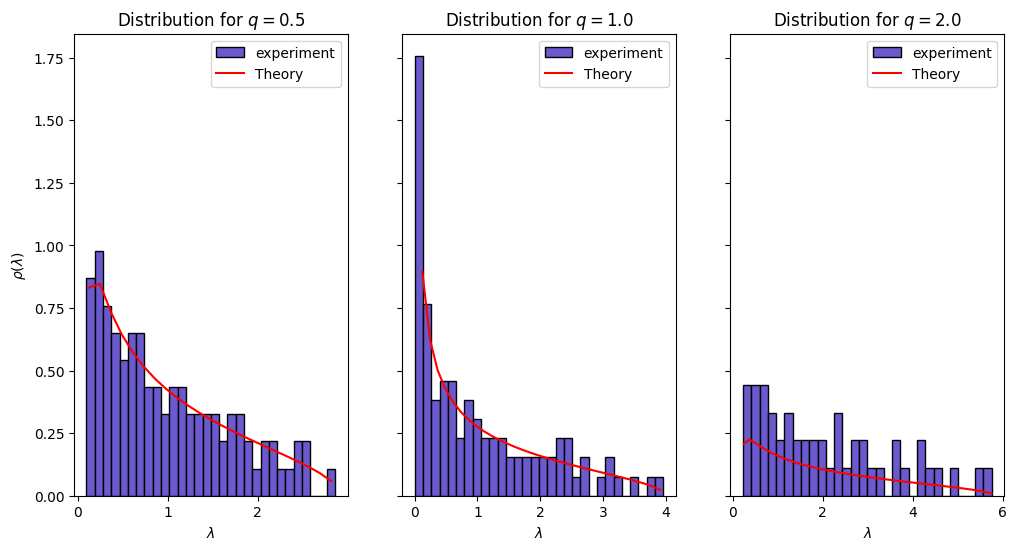

In [ ]:

fig, axs = plt.subplots(1,3, sharey=True, figsize = (12,6))


for i in range(3):
  q = N/t[i]
  #E = error(sm, gs[i])
  #axs[i].plot(x, E, color = 'slateblue' )
  #axs[i].plot(x, sm, color = 'red', label = 'semicircle')
  if q >= 1:
    newevals = eval[i, N-t[i] + 1:]
  else:
    newevals = eval[i]

  axs[i].hist(newevals, bins = 30 ,color = 'slateblue', ec = 'black', density = True, label = 'experiment')
  axs[i].plot(x1, mp(x1, q = q), color = 'red', label = 'Theory')
  axs[i].set_title('Distribution for $q = $' + str(q))

  axs[i].set_xlabel('$\lambda$')
  axs[i].legend(loc = 'best')
  

axs[0].set_ylabel('$\\rho(\lambda)$')
#
#axs[1].set_title('Error given $O(\eta)\sim 1/\sqrt{N}$')
#axs[2].set_title('Error given $O(\eta)\sim 1$')


plt.show()